# 0. Εισαγωγή των δεδομένων (training set)

Διαβάζουμε το Training Set με την βοήθεια της βιβλιοθήκης pandas

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../twitter_data/train2017.tsv', names=['id1','id2','Sentiment','Tweet'], sep='\t', encoding ='utf8')

tweets = list(df['Tweet'])
sentiments = list(df['Sentiment'])

# 1. Προεπεξεργασία και καθάρισμα των δεδομένων

Μετατρέπουμε όλα τα γράμματα σε πεζά.

In [3]:
for i in range(len(tweets)):
    tweets[i] = tweets[i].lower()

## a. Καθάρισμα των δεδομένων

Αφαιρούμε τα urls.

In [4]:
import re

In [5]:
for i in range(len(tweets)):
    tweets[i] = re.sub(r"http\S+", "", tweets[i])

Αφαιρούμε σύμβολα, σημεία στίξης, καθώς και emoticons που σχηματίζονται με αυτά.

In [6]:
from string import punctuation

In [7]:
def strip_punctuation(s): # strip function did not work for some reason, so we will use this function
    return ''.join(c for c in s if c not in punctuation)

In [8]:
for i in range(len(tweets)):
    tweets[i] = strip_punctuation(tweets[i])

## b. Tokenization

Θα χρησιμοποιήσουμε το NLTK (Natural Language Toolkit).

In [9]:
import nltk
from nltk import word_tokenize

Θα φτιάξουμε μια λίστα. Tα στοιχεία αυτής της λίστας θα είναι μια λίστα από τα tokens του κάθε tweet.

In [10]:
tokens = []
for tweet in tweets:
    tokens.append(word_tokenize(tweet))

## c. Stemming

Θα χρησιμοποιήσουμε τον Porter Stemmer ο οποίος χρησιμοποιείται ευρέως.

In [11]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

In [12]:
import copy
stemmed_tokens = copy.deepcopy(tokens) # Creates a copy of the tokens to stem them and keep the original tokens as well.

for i in range(len(stemmed_tokens)):
    for j in range(len(stemmed_tokens[i])):
        stemmed_tokens[i][j] = stemmer.stem(stemmed_tokens[i][j])

# 2. Aνάλυση των δεδομένων

Για τη δημιουργία των παρακάτω WordClouds, απαιτείται η εγκατάσταση των packages pillow και wordcloud.

Το pillow μπορεί να εγκατασταθεί εύκολα από το Anaconda Navigator. 

Για το wordcloud, απαιτείται η εντολή 'conda install -c conda-forge wordcloud' στο Anaconda Powershell Prompt.

In [13]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

stopwords = set(STOPWORDS) # Words that we do not want to see on the WordCloud
# Below are some extra stop words noticed with post processing
stopwords.update(["tomorrow", "day", "may", "today", "one", "two", "saturday", "friday", "sunday","will","going", "got", "now", "game", "thursday", "wednesday", "tuesday", "monday", "still", "1st", "2nd", "3rd", "im", "go", "night", "new","tonight","time","see"])

## a. Συνηθέστερες λέξεις σε ολόκληρο το σύνολο δεδομένων

Βάζουμε όλα τα "καθαρά" tweets σε ένα string.

In [14]:
all_tweets = ""
for tweet in tweets:
    all_tweets = all_tweets + " " + tweet

Θα χρησιμοποιήσουμε μια φωτογραφία ενός συννέφου ως μάσκα, ώστε το WordCloud να έχει αυτό το σχήμα.

In [15]:
mask = np.array(Image.open("./cloud.png"))

wc_all = WordCloud(background_color="white", max_words=250, mask=mask, scale=4, stopwords=stopwords).generate(all_tweets)

Θα προβάλουμε την εικόνα του WordCloud.

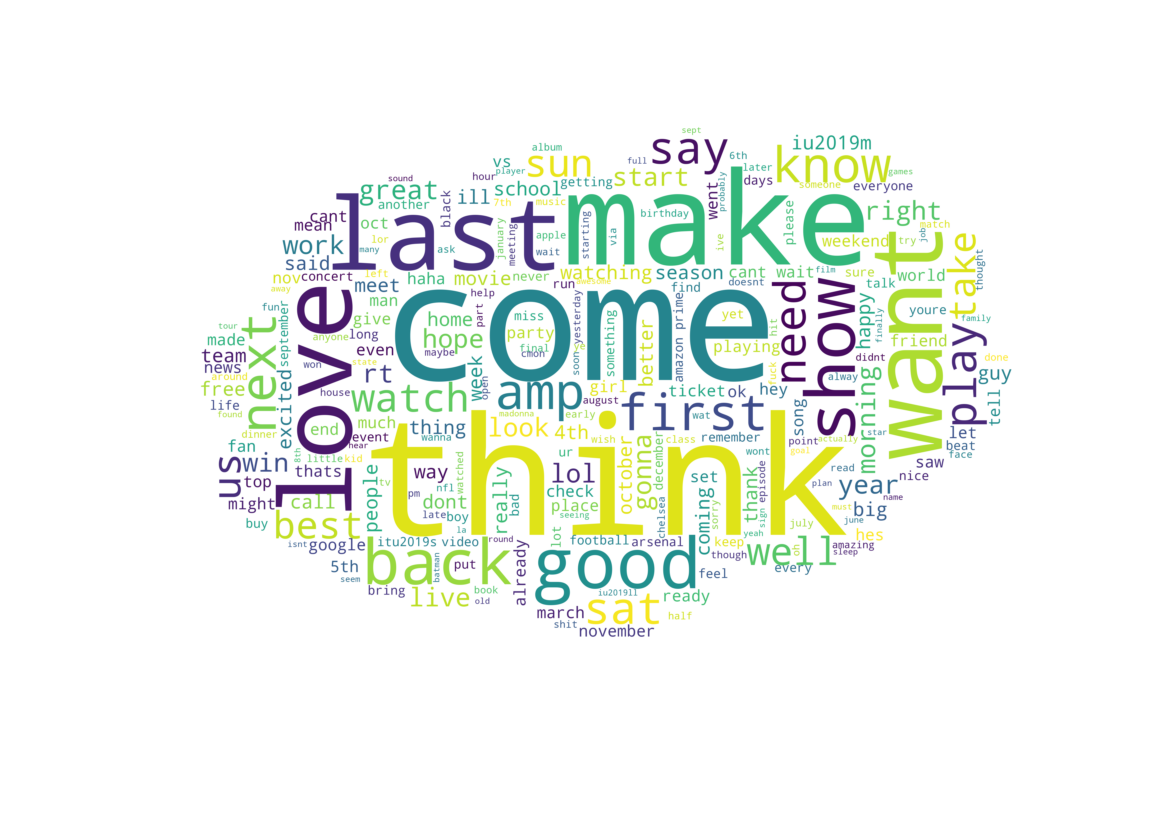

In [16]:
fig1 = plt.figure(1, figsize=(20, 20))

plt.imshow(wc_all, interpolation='bilinear')
plt.axis("off")
plt.show()

## b. Συνηθέστερες λέξεις στο σύνολο δεδομένων των αρνητικών tweets

Βάζουμε όλα τα "καθαρά" αρνητικά tweets σε ένα string.

In [17]:
negative_tweets = ""
for i in range(len(tweets)):
    if (sentiments[i] == "negative"):
        negative_tweets = negative_tweets + " " + tweets[i]

Θα χρησιμοποιήσουμε μια φωτογραφία ενός συννέφου ως μάσκα, ώστε το WordCloud να έχει αυτό το σχήμα.

In [18]:
wc_negative = WordCloud(background_color="white", max_words=250, mask=mask, scale=4, stopwords=stopwords).generate(negative_tweets)

Θα προβάλουμε την εικόνα του WordCloud.

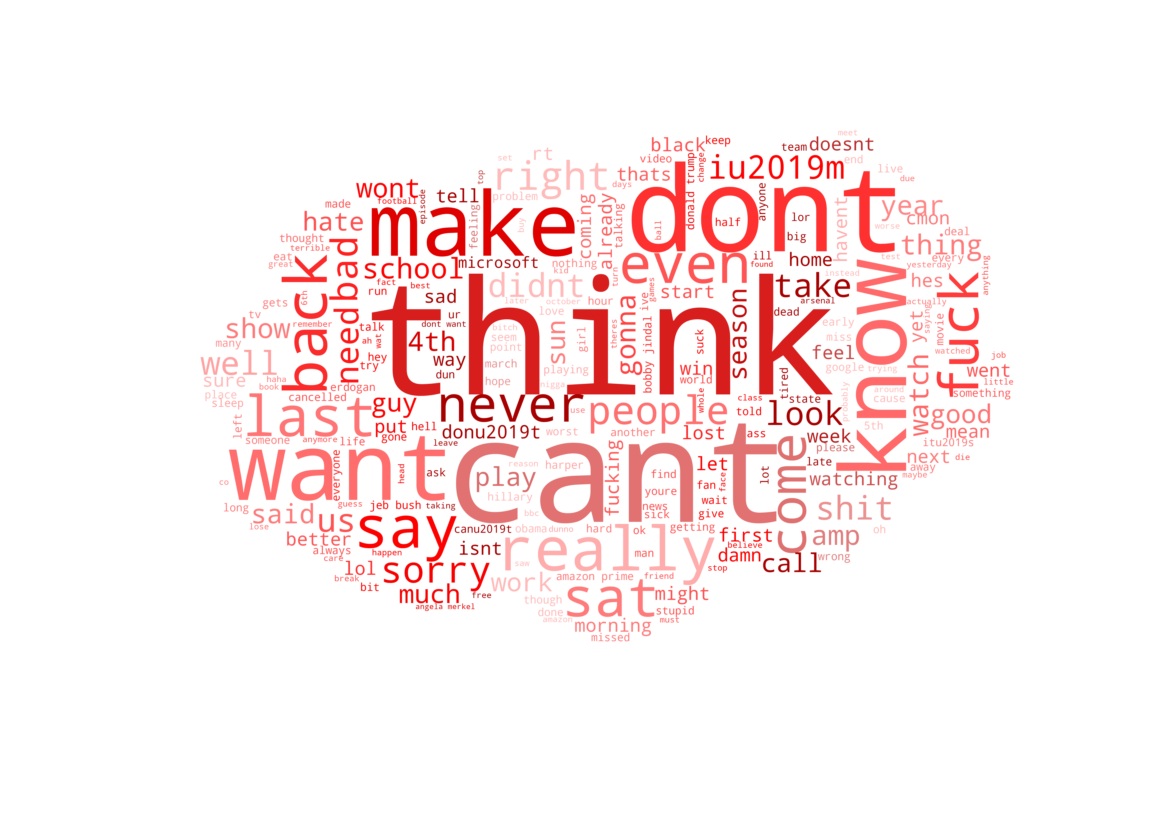

In [19]:
fig2 = plt.figure(1, figsize=(20, 20))

image_colors = ImageColorGenerator(np.array(Image.open("./red.png")))

plt.imshow(wc_negative.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.show()

## c. Συνηθέστερες λέξεις στο σύνολο δεδομένων των ουδέτερων tweets

Βάζουμε όλα τα "καθαρά" ουδέτερα tweets σε ένα string.

In [20]:
neutral_tweets = ""
for i in range(len(tweets)):
    if (sentiments[i] == "neutral"):
        neutral_tweets = neutral_tweets + " " + tweets[i]

Θα χρησιμοποιήσουμε μια φωτογραφία ενός συννέφου ως μάσκα, ώστε το WordCloud να έχει αυτό το σχήμα.

In [21]:
mask = np.array(Image.open("./cloud.png"))

wc_neutral = WordCloud(background_color="white", max_words=250, mask=mask, scale=4, stopwords=stopwords).generate(neutral_tweets)

Θα προβάλουμε την εικόνα του WordCloud.

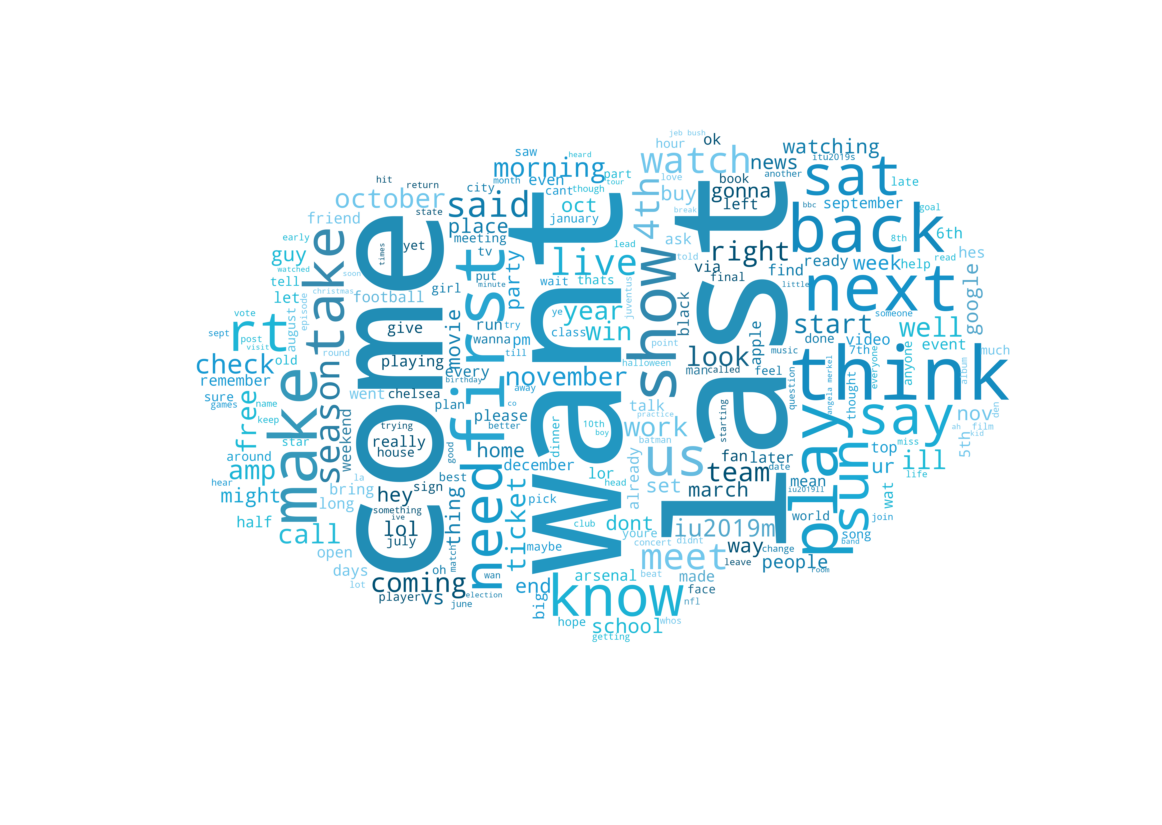

In [22]:
fig3 = plt.figure(1, figsize=(20, 20))

image_colors = ImageColorGenerator(np.array(Image.open("./blue.png")))

plt.imshow(wc_neutral.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.show()

## d. Συνηθέστερες λέξεις στο σύνολο δεδομένων των θετικών tweets

Βάζουμε όλα τα "καθαρά" θετικά tweets σε ένα string.

In [23]:
positive_tweets = ""
for i in range(len(tweets)):
    if (sentiments[i] == "positive"):
        positive_tweets = positive_tweets + " " + tweets[i]

Θα χρησιμοποιήσουμε μια φωτογραφία ενός συννέφου ως μάσκα, ώστε το WordCloud να έχει αυτό το σχήμα.

In [24]:
wc_positive = WordCloud(background_color="white", max_words=250, mask=mask, scale=4, stopwords=stopwords).generate(positive_tweets)

Θα προβάλουμε την εικόνα του WordCloud.

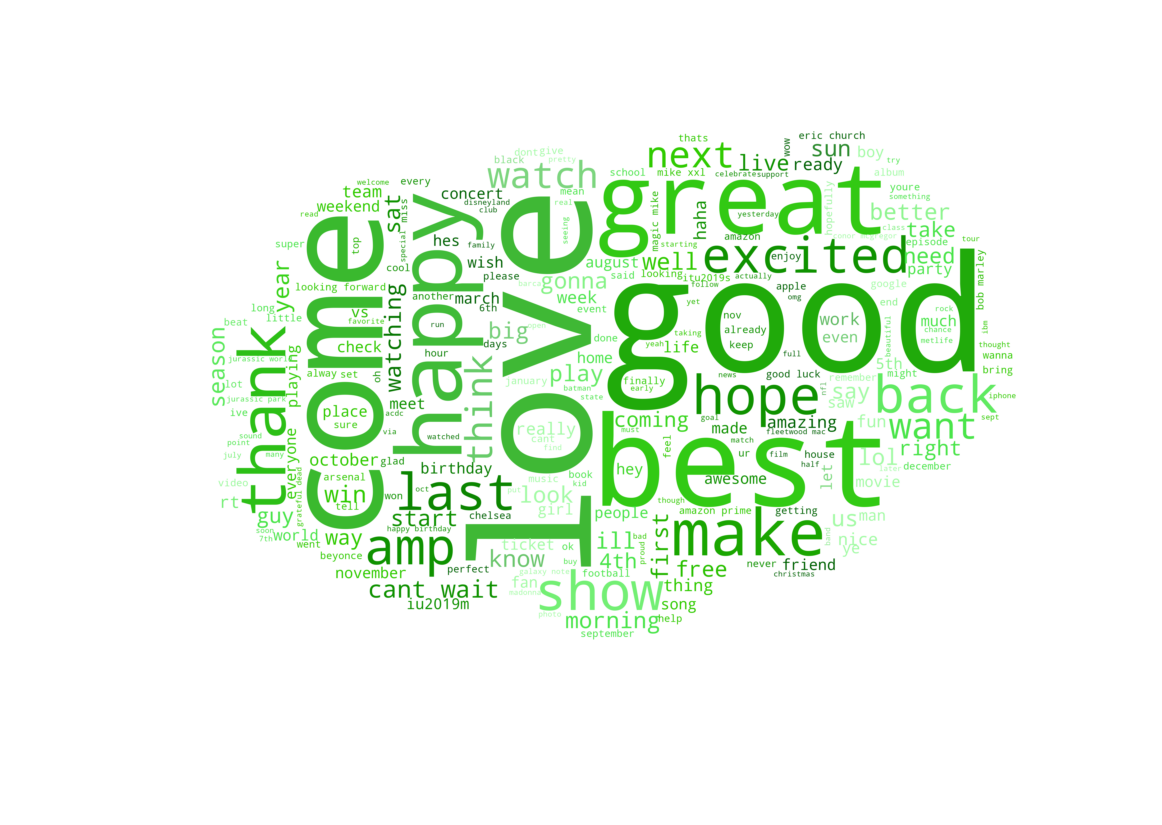

In [25]:
fig4 = plt.figure(1, figsize=(20, 20))

image_colors = ImageColorGenerator(np.array(Image.open("./green.png")))

plt.imshow(wc_positive.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.show()

## e. Συσχέτιση του πλήθους των λέξεων των tweets με το συναίσθημα

Στόχος των παρακάτω αναπαραστάσεων είναι να ερευνήσουμε αν υπάρχει κάποια συσχέτιση του πλήθους των λέξεων των tweets ανάλογα με το συναίσθημα που εκφράζουν.

### Θα υπολογίσουμε τον μέσο όρο των λέξεων ανά tweet σε κάθε κατηγορία συναισθημάτων και συνολικά.

In [26]:
# words_x: Number of words of tweets with x sentiment
# tweets_x: Number of tweets with x sentiment

words_all = 0
tweets_all = 0

words_negative = 0
tweets_negative = 0

words_neutral = 0
tweets_neutral = 0

words_positive = 0
tweets_positive = 0

for i in range(len(tokens)):
    words_all += len(tokens[i])
    tweets_all += 1
    
    if (sentiments[i] == "negative"):
        words_negative += len(tokens[i])
        tweets_negative += 1
        
    elif (sentiments[i] == "neutral"):
        words_neutral += len(tokens[i])
        tweets_neutral += 1
    
    elif (sentiments[i] == "positive"):
        words_positive += len(tokens[i])
        tweets_positive += 1

# Computes the average words per tweet
average_all = words_all / tweets_all
average_negative = words_negative / tweets_negative
average_neutral = words_neutral / tweets_neutral
average_positive = words_positive / tweets_positive

Θα προβάλλουμε το διάγραμμα με την μορφή μπάρων.

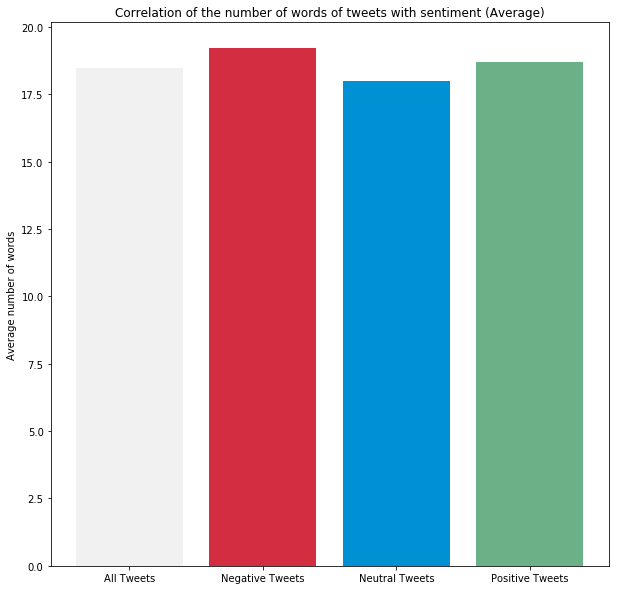

Average of all tweets:  18.47499821160312
Average of negative tweets:  19.208510638297874
Average of neutral tweets:  17.986455044041882
Average of positive tweets:  18.70224277860197


In [27]:
objects = ('All Tweets', 'Negative Tweets', 'Neutral Tweets', 'Positive Tweets')
y_pos = np.arange(len(objects))
performance = [average_all,average_negative,average_neutral,average_positive]

fig5 = plt.figure(1, figsize=(10, 10))

plt.bar(y_pos, performance, align='center', color=['#F1F1F1','#D32D41', '#0091D5', '#6AB187'])
plt.xticks(y_pos, objects)
plt.ylabel('Average number of words')
plt.title('Correlation of the number of words of tweets with sentiment (Average)')
plt.rcParams.update({'font.size': 15})

plt.show()
print("Average of all tweets: ", average_all)
print("Average of negative tweets: ",average_negative)
print("Average of neutral tweets: ", average_neutral)
print("Average of positive tweets: ", average_positive)

Βλέπουμε ότι τα αρνητικά tweets έχουν τον μεγαλύτερο μέσο όρο λέξεων.

Ακολουθεί ο μέσος όρος των θετικών tweets, ο οποίος επίσης βρίσκεται πάνω από τον μέσο όρο όλων των tweets.

Τέλος, ο μέσος όρος των ουδέτερων tweets είναι ο χαμηλότερος όλων.

Τα αποτελέματα μπορούν να θεωρηθούν λογικά, μιας και η έκφραση μη ουδέτερων (έντονων) συναισθημάτων συχνά συνδέεται με χρήση μεγαλύτερου αριθμού λέξεων.

### Θα υπολογίσουμε το median του πλήθους των λέξεων ανά tweet σε κάθε κατηγορία συναισθημάτων και συνολικά.

In [28]:
# list_x: List of number of words of tweets with x sentiment

list_all = []

list_negative = []

list_neutral = []

list_positive = []

for i in range(len(tokens)):
    list_all.append(len(tokens[i]))
    
    if (sentiments[i] == "negative"):
        list_negative.append(len(tokens[i]))
        
    elif (sentiments[i] == "neutral"):
        list_neutral.append(len(tokens[i]))
    
    elif (sentiments[i] == "positive"):
        list_positive.append(len(tokens[i]))

# Computes the mean number of words per tweet
median_all = np.median(list_all)
median_negative = np.median(list_negative)
median_neutral = np.median(list_neutral)
median_positive = np.median(list_positive)

Θα προβάλλουμε το διάγραμμα με την μορφή μπάρων.

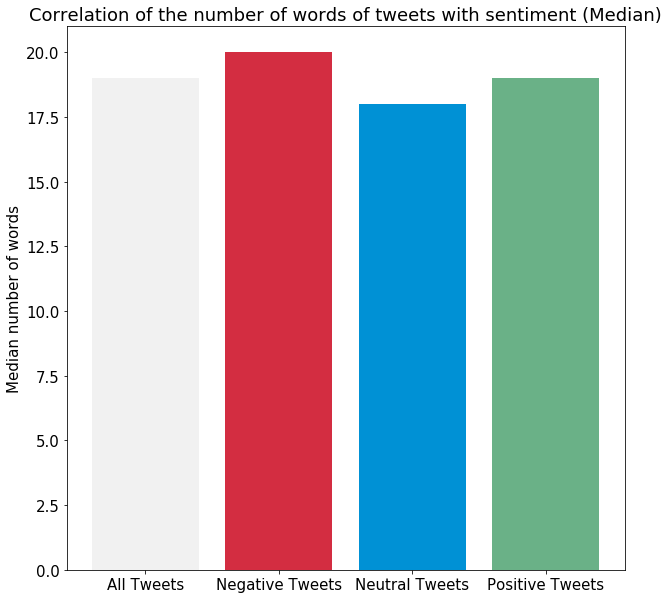

Median of all tweets:  19.0
Median of negative tweets:  20.0
Median of neutral tweets:  18.0
Median of positive tweets:  19.0


In [29]:
objects = ('All Tweets', 'Negative Tweets', 'Neutral Tweets', 'Positive Tweets')
y_pos = np.arange(len(objects))
performance = [median_all,median_negative,median_neutral,median_positive]

fig6 = plt.figure(1, figsize=(10, 10))

plt.bar(y_pos, performance, align='center', color=['#F1F1F1','#D32D41', '#0091D5', '#6AB187'])
plt.xticks(y_pos, objects)
plt.ylabel('Median number of words')
plt.title('Correlation of the number of words of tweets with sentiment (Median)')
plt.rcParams.update({'font.size': 15})

plt.show()
print("Median of all tweets: ", median_all)
print("Median of negative tweets: ",median_negative)
print("Median of neutral tweets: ", median_neutral)
print("Median of positive tweets: ", median_positive)

Παρατηρούμε ότι τα αποτελέσματα του median είναι πολύ παραπλήσια με τα αποτελέσματα του average.

## f. Συσχέτιση του πλήθους των συμβόλων των tweets με το συναίσθημα

Τα σύμβολα από μόνα τους αποτελούν τρόπο έκφρασης στον κόσμο του Twitter και όχι μόνο. Με την βοήθεια των συμβόλων μπορούμε να γράψουμε hashtags, emoticons, urls, stopwords και πολλά άλλα. 

Στόχος των παρακάτω αναπαραστάσεων είναι να ερευνήσουμε αν υπάρχει κάποια συσχέτιση του πλήθους των συμβόλων των tweets ανάλογα με το συναίσθημα που εκφράζουν.

Πρώτα θα πάρουμε τα "βρώμικα" tweets.

In [30]:
dirty_tweets = list(df['Tweet'])

Μετατρέπουμε όλα τα γράμματα σε πεζά για να τα αφαιρέσουμε πιο εύκολα.

In [31]:
for i in range(len(dirty_tweets)):
    dirty_tweets[i] = dirty_tweets[i].lower()

Αφαιρούμε όλα τα γράμματα και whitespace characters, κρατώντας μόνο τα σύμβολα. To μόνο whitespace character που έχουν τα tweets αυτά είναι το κενό.

In [32]:
letters_numbers = 'abcdefghijklmnopqrstuvwxyz123456789'

def strip_letters_numbers(s): # Removes all leters and numbers
    return ''.join(c for c in s if c not in letters_numbers)

def strip_spaces(s): # Removes all spaces
    return s.replace(" ", "")

In [33]:
for i in range(len(dirty_tweets)):
    dirty_tweets[i] = strip_letters_numbers(dirty_tweets[i])
    dirty_tweets[i] = strip_spaces(dirty_tweets[i])

### Θα υπολογίσουμε τον μέσο όρο των λέξεων ανά tweet σε κάθε κατηγορία συναισθημάτων και συνολικά.

In [34]:
# symbols_x: Number of symbols of tweets with x sentiment
# tweets_x: Number of tweets with x sentiment

symbols_all = 0
tweets_all = 0

symbols_negative = 0
tweets_negative = 0

symbols_neutral = 0
tweets_neutral = 0

symbols_positive = 0
tweets_positive = 0

for i in range(len(dirty_tweets)):
    symbols_all += len(dirty_tweets[i])
    tweets_all += 1
    
    if (sentiments[i] == "negative"):
        symbols_negative += len(dirty_tweets[i])
        tweets_negative += 1
        
    elif (sentiments[i] == "neutral"):
        symbols_neutral += len(dirty_tweets[i])
        tweets_neutral += 1
    
    elif (sentiments[i] == "positive"):
        symbols_positive += len(dirty_tweets[i])
        tweets_positive += 1

# Computes the average words per tweet
average_all = symbols_all / tweets_all
average_negative = symbols_negative / tweets_negative
average_neutral = symbols_neutral / tweets_neutral
average_positive = symbols_positive / tweets_positive

Θα προβάλλουμε το διάγραμμα με την μορφή μπάρων.

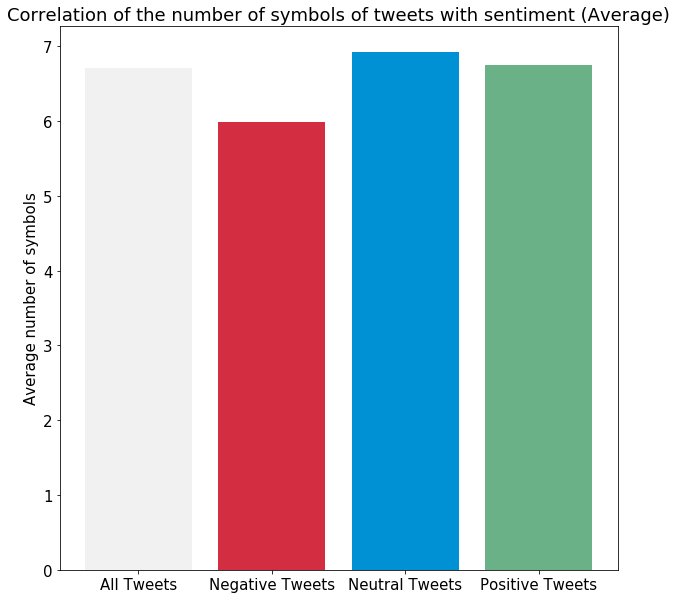

Average of all tweets:  6.706989055011088
Average of negative tweets:  5.994624860022396
Average of neutral tweets:  6.923882333388732
Average of positive tweets:  6.75678505977834


In [35]:
objects = ('All Tweets', 'Negative Tweets', 'Neutral Tweets', 'Positive Tweets')
y_pos = np.arange(len(objects))
performance = [average_all,average_negative,average_neutral,average_positive]

fig5 = plt.figure(1, figsize=(10, 10))

plt.bar(y_pos, performance, align='center', color=['#F1F1F1','#D32D41', '#0091D5', '#6AB187'])
plt.xticks(y_pos, objects)
plt.ylabel('Average number of symbols')
plt.title('Correlation of the number of symbols of tweets with sentiment (Average)')
plt.rcParams.update({'font.size': 15})

plt.show()
print("Average of all tweets: ", average_all)
print("Average of negative tweets: ",average_negative)
print("Average of neutral tweets: ", average_neutral)
print("Average of positive tweets: ", average_positive)

Βλέπουμε ότι τα αρνητικά tweets έχουν τον μικρότερο μέσο όρο συμβόλων, αρκετά πιο κάτω από τον μέσο όρο όλων των tweets.

Ακολουθεί ο μέσος όρος των θετικών tweets, ο οποίος βρίσκεται πάνω από τον μέσο όρο όλων των tweets.

Τέλος, ο μέσος όρος των ουδέτερων tweets είναι ο μεγαλύτερος όλων.

Ωστόσο, οι διαφορές μεταξύ των ουδέτερων, των θετικών και όλων των tweets είναι αρκετά μικρές.

### Θα υπολογίσουμε το median του πλήθους των λέξεων ανά tweet σε κάθε κατηγορία συναισθημάτων και συνολικά.

In [36]:
# list_x: List of number of symbols of tweets with x sentiment

list_all = []

list_negative = []

list_neutral = []

list_positive = []

for i in range(len(dirty_tweets)):
    list_all.append(len(dirty_tweets[i]))
    
    if (sentiments[i] == "negative"):
        list_negative.append(len(dirty_tweets[i]))
        
    elif (sentiments[i] == "neutral"):
        list_neutral.append(len(dirty_tweets[i]))
    
    elif (sentiments[i] == "positive"):
        list_positive.append(len(dirty_tweets[i]))

# Computes the mean number of words per tweet
median_all = np.median(list_all)
median_negative = np.median(list_negative)
median_neutral = np.median(list_neutral)
median_positive = np.median(list_positive)

Θα προβάλλουμε το διάγραμμα με την μορφή μπάρων.

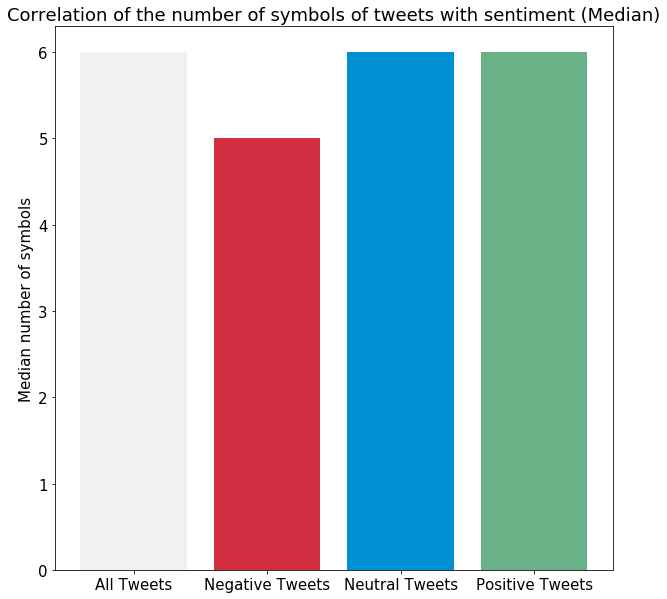

Median of all tweets:  6.0
Median of negative tweets:  5.0
Median of neutral tweets:  6.0
Median of positive tweets:  6.0


In [37]:
objects = ('All Tweets', 'Negative Tweets', 'Neutral Tweets', 'Positive Tweets')
y_pos = np.arange(len(objects))
performance = [median_all,median_negative,median_neutral,median_positive]

fig6 = plt.figure(1, figsize=(10, 10))

plt.bar(y_pos, performance, align='center', color=['#F1F1F1','#D32D41', '#0091D5', '#6AB187'])
plt.xticks(y_pos, objects)
plt.ylabel('Median number of symbols')
plt.title('Correlation of the number of symbols of tweets with sentiment (Median)')
plt.rcParams.update({'font.size': 15})

plt.show()
print("Median of all tweets: ", median_all)
print("Median of negative tweets: ",median_negative)
print("Median of neutral tweets: ", median_neutral)
print("Median of positive tweets: ", median_positive)

Παρατηρούμε ότι τα αποτελέσματα του median είναι παραπλήσια με τα αποτελέσματα του average. Όλες οι κατηγορίες έχουν τον ίδιο median, εκτός των αρνητικών tweets, που έχουν μία μονάδα χαμηλότερο median.

# 4. Vectorization - εξαγωγή χαρακτηριστικών

Σε αυτή την ενότητα θα χρειαστούμε το πακέτο pickle για την αποθήκευση των vectors της κάθε μεθόδου.

In [38]:
import pickle

### Προετοιμασία του training set

In [39]:
training_tweets = tweets # Renames the tweets we have used so far as the tweets of the training set
training_tokens = tokens # Renames the tokens we have used so far as the tokens of the training set

ytrain = list(df['Sentiment']) # Caches the train data labels

### Προετοιμασία του test set

In [40]:
df2 = pd.read_csv('../twitter_data/test2017.tsv', names=['id1','id2','Sentiment','Tweet'], sep='\t', encoding ='utf8')

test_tweets = list(df2['Tweet'])

df3 = pd.read_csv('../twitter_data/SemEval2017_task4_subtaskA_test_english_gold.txt', names=['id1','Sentiment'], sep='\t', encoding ='utf8')

yvalid = list(df3['Sentiment']) # Caches the test data labels to evaluate later on

# The 'answers' of the test set are in the same order as the test set ; lines of the two files correspond to the same tweet

#### Προεπεξεργασία και καθάρισμα του test set

Μετατρέπουμε όλα τα γράμματα σε πεζά.

In [41]:
for i in range(len(test_tweets)):
    test_tweets[i] = test_tweets[i].lower()

#### Καθάρισμα του test set

Αφαιρούμε τα urls.

In [42]:
for i in range(len(test_tweets)):
    test_tweets[i] = re.sub(r"http\S+", "", test_tweets[i])

Αφαιρούμε σύμβολα, σημεία στίξης, καθώς και emoticons που σχηματίζονται με αυτά.

In [43]:
for i in range(len(test_tweets)):
    test_tweets[i] = strip_punctuation(test_tweets[i])

#### Tokenization του test set

Θα χρησιμοποιήσουμε το NLTK (Natural Language Toolkit).

Θα φτιάξουμε μια λίστα. Tα στοιχεία αυτής της λίστας θα είναι μια λίστα από τα tokens του κάθε tweet.

In [44]:
test_tokens = []
for tweet in test_tweets:
    test_tokens.append(word_tokenize(tweet))

## a. Bag-of-words

Για τη μέθοδο Bag-of-words θα χρησιμοποιήσουμε τo πακέτο sklearn.

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

Για το training set (αποθηκεύουμε το αποτέλεσμα για μελλοντική χρήση):

In [46]:
bow_vectorizer = CountVectorizer(max_df=1.0, min_df=1, max_features=1000, stop_words='english')
bow_xtrain = bow_vectorizer.fit_transform(training_tweets)

pickle_out = open("bow_xtrain.pickle","wb")
pickle.dump(bow_xtrain, pickle_out)
pickle_out.close()

Για το test set (αποθηκεύουμε το αποτέλεσμα για μελλοντική χρήση):

In [47]:
bow_xtest = bow_vectorizer.transform(test_tweets)

pickle_out = open("bow_xtest.pickle","wb")
pickle.dump(bow_xtest, pickle_out)
pickle_out.close()

Αν έχουμε ήδη αποθηκεύσει τα vectors σε αρχεία, μπορούμε να τα φορτώσουμε.

## b. Tf-idf

Για τη μέθοδο Tf-idf θα χρησιμοποιήσουμε τo πακέτο sklearn.

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

Για το training set (αποθηκεύουμε το αποτέλεσμα για μελλοντική χρήση):

In [49]:
tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=1000, stop_words='english') 
tfidf_xtrain = tfidf_vectorizer.fit_transform(training_tweets)

pickle_out = open("tfidf_xtrain.pickle","wb")
pickle.dump(tfidf_xtrain, pickle_out)
pickle_out.close()

Για το test set (αποθηκεύουμε το αποτέλεσμα για μελλοντική χρήση):

In [50]:
tfidf_xtest = tfidf_vectorizer.transform(test_tweets)

pickle_out = open("tfidf_xtest.pickle","wb")
pickle.dump(tfidf_xtest, pickle_out)
pickle_out.close()

Αν έχουμε ήδη αποθηκεύσει τα vectors σε αρχεία, μπορούμε να τα φορτώσουμε.

## c. Word Embeddings

Για την μέθοδο Word Embeddings θα χρησιμοποιήσουμε το πακέτο gensim για τη δημιουργία ενός word2vec μοντέλου.

Για την εγκατάσταση του gensim απαιτείται η εντολή 'conda install gensim' στο Anaconda Powershell Prompt.

In [51]:
from gensim.models import Word2Vec

C:\Users\stasi\Anaconda3\lib\site-packages\smart_open\ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')
C:\Users\stasi\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Θα φτιάξουμε και θα εκπαιδεύσουμε το μοντέλο. Έπειτα, θα το αποθηκεύσουμε για μελλοντική χρήση.

In [52]:
model_w2v = Word2Vec(
            training_tokens,
            size=300, # desired no. of features/independent variables
            window=5, # context window size
            min_count=1,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 

model_w2v.train(training_tokens, total_examples = len(training_tweets), epochs=20)

(8507332, 10330480)

### Δημιουργία και οπτικοποίηση ενός t-SNE μοντέλου

Θα φτιάξουμε μια συνάρτηση για τον σκοπό αυτό.

In [90]:
from sklearn.manifold import TSNE

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    for word in model.wv.vocab:
        if (len(tokens) > 300): # Avoids using all words, because its too many words and it is unable to see
            break
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2000, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []

    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
               textcoords='offset points',
                         ha='right',
                         va='bottom')
    plt.show()

Θα καλέσουμε την παραπάνω συνάρτηση.

C:\Users\stasi\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


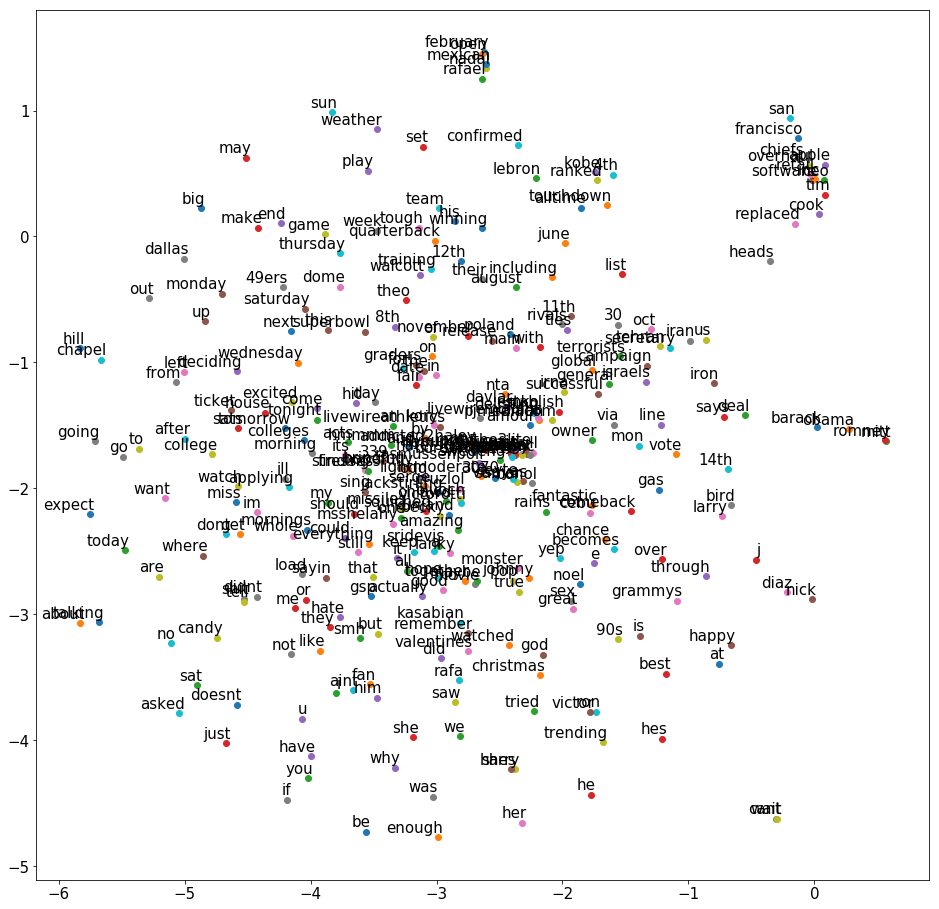

In [91]:
tsne_plot(model_w2v)

Θα χρησιμοποιήσουμε ένα έτοιμο τμήμα κώδικα, το οποίο δημιουργεί μια κλάση που στοχεύει να αυτοματοποιήσει την μετατροπή των word vectors που δημιουργεί το Word Embeddings σε feature vector.

Πηγή: https://www.kaggle.com/reiinakano/basic-nlp-bag-of-words-tf-idf-word2vec-lstm

In [55]:
class MyTokenizer: # An extra class to help tokenize in np.arrays to use np.mean later
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        transformed_X = []
        for document in X:
            tokenized_doc = []
            for sent in nltk.sent_tokenize(document):
                tokenized_doc += nltk.word_tokenize(sent)
            transformed_X.append(np.array(tokenized_doc))
        return np.array(transformed_X)
    
    def fit_transform(self, X, y=None):
        return self.transform(X)

class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(word2vec.wv.syn0[0])

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = MyTokenizer().fit_transform(X)
        
        return np.array([
            np.mean([self.word2vec.wv[w] for w in words if w in self.word2vec.wv]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])
    
    def fit_transform(self, X, y=None):
        return self.transform(X)

Για το training set (αποθηκεύουμε το αποτέλεσμα για μελλοντική χρήση):

In [56]:
mean_embedding_vectorizer = MeanEmbeddingVectorizer(model_w2v)
w2v_xtrain = mean_embedding_vectorizer.fit_transform(training_tweets)

pickle_out = open("w2v_xtrain.pickle","wb")
pickle.dump(w2v_xtrain, pickle_out)
pickle_out.close()

C:\Users\stasi\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).


Για το test set (αποθηκεύουμε το αποτέλεσμα για μελλοντική χρήση):

In [57]:
w2v_xtest = mean_embedding_vectorizer.transform(test_tweets)

pickle_out = open("w2v_xtest.pickle","wb")
pickle.dump(w2v_xtest, pickle_out)
pickle_out.close()

Αν έχουμε ήδη αποθηκεύσει τα vectors σε αρχεία, μπορούμε να τα φορτώσουμε.

# 5. Προσθήκη χαρακτηριστικών στο διάνυσμα λέξης

## a. Λεξικά

Θα χρησιμοποιήσουμε μόνο το λεξικό affin. Η εξήγηση βρίσκεται στα τελικά συμπεράσματα.

Για πιο γρήγορη προσπέλαση στο λεξικό, θα φορτώσουμε το λεξικό σε dictionary.

In [92]:
affin = {}
with open("../lexica/affin/affin.txt") as f:
    list_lines = f.read().splitlines()
    for line in list_lines:
        (key, val) = line.split("\t")
        if " " not in key:
            affin[key] = float(val)

Για το training set:

In [59]:
w2v_extra_xtrain = copy.deepcopy(w2v_xtrain)
w2v_extra_xtrain = w2v_extra_xtrain.tolist() # Turns the vector from np.array to list to use append later on more efficiently

for i in range(len(training_tokens)):
    sentim_values = [] # A list to collect all the sentiment values of the words in each tweet
    for token in training_tokens[i]:
        if token in affin: # If this word exists in lexica
            sentim_values.append(affin[token])
            
    if not len(sentim_values): # If all the words of the tweet did not exist in lexica
        lexica_feature = 0 # Sets it to 0
    else: # If there was at least one word of the tweet with sentiment value in lexica
        lexica_feature = np.mean(np.array(sentim_values)) # The feature that we are going to add in is the mean of that list
        
    w2v_extra_xtrain[i].append(lexica_feature)

Για το test set:

In [60]:
w2v_extra_xtest = copy.deepcopy(w2v_xtest)
w2v_extra_xtest = w2v_extra_xtest.tolist() # Turns the vector from np.array to list to use append later on more efficiently

for i in range(len(test_tokens)):
    sentim_values = [] # A list to collect all the sentiment values of the words in each tweet
    for token in test_tokens[i]:
        if token in affin: # If this word exists in lexica
            sentim_values.append(affin[token])
    
    if not len(sentim_values): # If all the words of the tweet did not exist in lexica
        lexica_feature = 0 # Sets it to 0
    else: # If there was at least one word of the tweet with sentiment value in lexica
        lexica_feature = np.mean(np.array(sentim_values)) # The feature that we are going to add in is the mean of that list
        
    w2v_extra_xtest[i].append(lexica_feature)

## b. Επιπλέον χαρακτηριστικά

Πέρα των λεξικών, αποφασίσαμε να προσθέσουμε 3 ακόμα features στα vectors.

#### Mέση Τιμή και Τυπική Απόκλιση του vector

Για την τυπική απόκλιση θα χρειαστούμε το πακέτο statistics.

In [61]:
import statistics

In [62]:
for i in range(len(w2v_extra_xtrain)):
    mean_value = np.mean(w2v_extra_xtrain[i]) # Calculates mean value
    stand_dev_value = statistics.stdev(w2v_extra_xtrain[i]) # Calculates standard deviation value
    
    w2v_extra_xtrain[i].append(mean_value) # Appends mean value
    w2v_extra_xtrain[i].append(stand_dev_value) # Appends standard deviation value
    
for i in range(len(w2v_extra_xtest)):
    mean_value = np.mean(w2v_extra_xtest[i]) # Calculates mean value
    stand_dev_value = statistics.stdev(w2v_extra_xtest[i]) # Calculates standard deviation value
    
    w2v_extra_xtest[i].append(mean_value) # Appends mean value
    w2v_extra_xtest[i].append(stand_dev_value) # Appends standard deviation value

#### Αριθμός λέξεων (tokens) του tweet

In [63]:
for i in range(len(training_tokens)):
    number_of_tokens = len(training_tokens[i]) # Calculates the number of tokens in each tweet
    w2v_extra_xtrain[i].append(number_of_tokens) # Appends the number of tokens in vector
    
for i in range(len(test_tokens)):
    number_of_tokens = len(test_tokens[i]) # Calculates the number of tokens in each tweet
    w2v_extra_xtest[i].append(number_of_tokens)  # Appends the number of tokens in vector

Aποθηκεύουμε τα αποτέλεσματα για μελλοντική χρήση:

In [64]:
pickle_out = open("w2v_extra_xtrain.pickle","wb")
pickle.dump(w2v_extra_xtrain, pickle_out)
pickle_out.close()

pickle_out = open("w2v_extra_xtest.pickle","wb")
pickle.dump(w2v_extra_xtest, pickle_out)
pickle_out.close()

Αν έχουμε ήδη αποθηκεύσει τα vectors σε αρχεία, μπορούμε να τα φορτώσουμε.

# 6. Δοκιμάζουμε ταξινομητές

Θα εκπαιδεύσουμε και θα δοκιμάσουμε τους ταξινομητές SVM και KNN με κάθε feature vector που φτιάξαμε νωρίτερα, ώστε να συγκρίνουμε την αποτελεσματικότητα τόσο των ταξινομητών όσο και των μεθόδων εξαγωγής χαρακτηριστικών.

Για τον υπολογισμό της ακρίβειας των προβλέψεων των ταξινομητών θα χρησιμοποιηθεί η εντολή accuracy_score.

In [65]:
from sklearn.metrics import accuracy_score

## a. SVM

In [66]:
from sklearn import svm

#### Για την μέθοδο Bag-of-words:

In [67]:
svc1 = svm.SVC(kernel='linear', C=1, probability=True)
svc1 = svc1.fit(bow_xtrain, ytrain)
prediction1 = svc1.predict(bow_xtest) #predict on the test set

print("Accuracy score of Bag-of-words with SVM Classifier: ", accuracy_score(yvalid, prediction1)) #evaluate on the test set

Accuracy score of Bag-of-words with SVM Classifier:  0.5385867795506349


#### Για την μέθοδο Tf-idf:

In [68]:
svc2 = svm.SVC(kernel='linear', C=1, probability=True)
svc2 = svc2.fit(tfidf_xtrain, ytrain)
prediction2 = svc2.predict(tfidf_xtest) #predict on the test set

print("Accuracy score of Tf-idf with SVM Classifier: ", accuracy_score(yvalid, prediction2)) #evaluate on the test set

Accuracy score of Tf-idf with SVM Classifier:  0.5330511234125692


#### Για την μέθοδο Word Embeddings:

In [69]:
svc3 = svm.SVC(kernel='linear', C=1, probability=True)
svc3 = svc3.fit(w2v_xtrain, ytrain)
prediction3 = svc3.predict(w2v_xtest) #predict on the test set

print("Accuracy score of Word Embeddings with SVM Classifier: ", accuracy_score(yvalid, prediction3)) #evaluate on the test set

Accuracy score of Word Embeddings with SVM Classifier:  0.5286551611852817


#### Για την μέθοδο Word Embeddings με επιπλέον χαρακτηριστικά:

In [70]:
svc4 = svm.SVC(kernel='linear', C=1, probability=True)
svc4 = svc4.fit(w2v_extra_xtrain, ytrain)
prediction4 = svc4.predict(w2v_extra_xtest) #predict on the test set

print("Accuracy score of Word Embeddings and Feature Scaling with SVM Classifier: ", accuracy_score(yvalid, prediction4)) #evaluate on the test set

Accuracy score of Word Embeddings and Feature Scaling with SVM Classifier:  0.5840931292738522


## b. KNN

In [71]:
from sklearn import neighbors

#### Για την μέθοδο Bag-of-words:

In [72]:
knc5 = neighbors.KNeighborsClassifier(n_neighbors=5)
knc5 = knc5.fit(bow_xtrain, ytrain)
prediction5 = knc5.predict(bow_xtest) #predict on the test set

print("Accuracy score of Bag-of-words with SVM Classifier: ", accuracy_score(yvalid, prediction5)) #evaluate on the test set

Accuracy score of Bag-of-words with SVM Classifier:  0.46450667535004886


#### Για την μέθοδο Tf-idf:

In [73]:
knc6 = neighbors.KNeighborsClassifier(n_neighbors=5)
knc6 = knc6.fit(tfidf_xtrain, ytrain)
prediction6 = knc6.predict(tfidf_xtest) #predict on the test set

print("Accuracy score of Tf-idf with SVM Classifier: ", accuracy_score(yvalid, prediction6)) #evaluate on the test set

Accuracy score of Tf-idf with SVM Classifier:  0.4382937154021491


#### Για την μέθοδο Word Embeddings:

In [74]:
knc7 = neighbors.KNeighborsClassifier(n_neighbors=5)
knc7 = knc7.fit(w2v_xtrain, ytrain)
prediction7 = knc7.predict(w2v_xtest) #predict on the test set

print("Accuracy score of Word Embeddings with SVM Classifier: ", accuracy_score(yvalid, prediction7)) #evaluate on the test set

Accuracy score of Word Embeddings with SVM Classifier:  0.4781830022793878


#### Για την μέθοδο Word Embeddings με επιπλέον χαρακτηριστικά:

In [75]:
knc8 = neighbors.KNeighborsClassifier(n_neighbors=3)
knc8 = knc8.fit(w2v_extra_xtrain, ytrain)
prediction8 = knc8.predict(w2v_extra_xtest) #predict on the test set

print("Accuracy score of Word Embeddings and Feature Scaling with SVM Classifier: ", accuracy_score(yvalid, prediction8)) #evaluate on the test set

Accuracy score of Word Embeddings and Feature Scaling with SVM Classifier:  0.5096059915337023


# 7. Παρουσίαση αποτελεσμάτων και συμπεράσματα

|                                              |SVM               | KNN               |
|----------------------------------------------|------------------|-------------------|
|__Bag-of-words__                              |0.5385867795506349|0.46450667535004886|
|__Tf-idf__                                    |0.5330511234125692|0.4382937154021491 |
|__Word Embeddings__                           |0.5286551611852817|0.4781830022793878 |
|__Word Embeddings με επιπλέον χαρακτηριστικά__|0.5840931292738522|0.5096059915337023 |

# 8. Συμπεράσματα σχετικά με την εξαγωγή χαρακτηριστικών και την ταξινόμηση

• Έπειτα από δοκιμή αρκετών συνδυασμών των λεξικών affin, emotweet, generic, nrc και nrctag, καταλήξαμε στο συμπέρασμα ότι η χρήση του λεξικού affin βελτίωνε την ακρίβεια των προβλέψεων περισσότερο απ'όλους τους συνδυασμούς λεξικών.

• Με την χρήση πολλών λεξικών, η ακρίβεια έπεφτε αισθητά. Πιθανόν με κάποιο normalization στις τιμές τον λεξικών το αποτέλεσμα να ήταν καλύτερο.

• Η χρήση των επιπλέον χαρακτηριστικών, πέρα του λεξικού, δεν βελτίωσε σχεδόν καθόλου την ακρίβεια των προβλέψεων. Επιπλέον, δοκιμάστηκαν και αφαιρέθηκαν τα χαρακτηριστικά, όπου χωρίζουμε το tweet σε δύο μέρη και υπολογίζουμε την μέση τιμή valence στο πρώτο και στο δεύτερο μισό, διότι μείωναν την ακρίβεια των προβλέψεων.

• Ο ταξινομητής SVM φαίνεται να είναι αρκετά καλύτερος του KNN όσον αφορά την ακρίβεια των προβλέψεων.

• Στον ταξινομητή SVM, η χρήση πολυπλοκότερων kernels είχε ως αποτέλεσμα το πρόγραμμα να καθυστερεί αρκετά περισσότερο, οπότε και εγκαταλείφθηκαν.

• Στον ταξινομητή KNN, o αριθμός των γειτόνων που χρησιμοποιούνται φάνηκε να επηρεάζει το τελικό αποτέλεσμα. Ωστόσο, οι περισσότεροι γείτονες δεν σημαίνει πάντα και καλύτερη ακρίβεια.

• Γενικότερα γνωρίζουμε ότι: Word Embeddings με επιπλέον χαρακτηριστικά > Word Embeddings > Tf-idf > Bag-of-words
Στην πράξη όμως βλέπουμε ότι τα αποτελέσματα ποικίλουν, καθώς είναι πολλοί οι παράγοντες που επηρεάζουν την ακρίβεια των προβλέψεων. Πιο συγκεκριμένα, για τις μεθόδους Bag-of-words και Tf-idf η αύξηση των μέγιστων χαρακτηριστικών σε 1000 αύξησε την ακρίβεια των προβλέψεων τους αισθητά. Από την άλλη, η μέθοδος Word Embeddings θα τα είχε πάει καλύτερα αν είχαμε χρησιμοποιήσει μια μέθοδο Tf-idf για την ένωση των vectors αντί για τη μέθοδο του mean. Τέλος, το επιπλέον χαρακτηριστικό του λεξικού στα vectors του Word Embeddings βελτίωσε αρκετά την ακρίβεια προβλέψεων.

• Mε εκτενέστερη ανάλυση τον προβλέψεων των ταξινομητών, βλέπουμε ότι γενικότερα η χαμηλή επίδοση οφείλεται εν μέρει στην δυσκολία εντοπισμού των ουδέτερων tweets. Βέβαια, η μέθοδος Word Embeddings καταφέρνει να αμβλύνει ως ένα βαθμό το πρόβλημα αυτό.

• Από την άλλη πλευρά, οι προβλέψεις στα θετικά και αρνητικά tweets έχουν συνήθως μεγαλύτερη ακρίβεια εντοπισμού σε σχέση με τα ουδέτερα tweets.

__Υποσημείωση:__
Τα αρχεία .pickle δεν συνοδεύονται με το παραδοτέο, διότι ήταν αρκετά μεγάλα σε μέγεθος (~200MB). To Notebook αυτό είναι σε θέση να τα παράξει, να τα κάνει save και load αν χρειαστεί.